In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10am __the day before the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Put your name here: Pavan Yachamaneni </p>

---
# __Statistical Analysis: Pre-class__

# Learning objectives

At the end of the exercise, you should be able to:
- Explain what exploratory data analysis (EDA) is.
- Combine the use of statistics and graphics for EDA.
- Distinguish response and predictive variables.
- Explain why we need to split data into traning and testing subsets.
- Build a basic linear regression model and evaluate its performance.

# Goals for today's pre-class assignment 

1. [Exploratory data analysis (EDA)](#eda)
1. [EDA types](#eda_type)
1. [Basic linear model](#linear)
1. [Assignment wrap-up](#wrapup)

----
<a name="eda"></a>

# 1. Exploratory data analysis

Let's say you have been asked to do some statistical analysis of some data. The 1st step is always __exploratory data analysis (EDA)__, i.e., "to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods" ([IBM Cloud Learning Hub](https://www.ibm.com/cloud/learn/exploratory-data-analysis)).

## 1.1 What EDA is and why

&#9989; **<font color=red>QUESTION:</font>** Read the [IBM Cloud Learning Hub](https://www.ibm.com/cloud/learn/exploratory-data-analysis) page on EDA and answer the following questions:

- Why is EDA important?
- In the article, six kinds of EDA tools (e.g., clustering, univariate visualization...) are mentioned. List couple you have used in the past and explain what questions you were trying to address and what data was used.


<font size=+3>&#9998;</font> 
- EDA is the primary experimentation on data, it tells what is going on, what is needed to be done and what could be the end outcome.
- I have uses Univariate graphs in past as they helped me to visualize the distribution of the data.

## 1.2 Get data for EDA

&#9989; **<font color=blue>DO THIS:</font>** In the linear algebra 2 pre-class, we played with the [California housing prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices). Let's fetch it again for EDA.

In [1]:
from sklearn.datasets import fetch_california_housing

# Fetch the data and extract the dataframe from it.
ca_house = fetch_california_housing(as_frame=True).frame
ca_house.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

&#9989; **<font color=blue>DO THIS:</font>** Have a quick look at the data:

- Figure out what the data type of `ca_house` is.
- Determine its dimension (i.e., how big it is). Try `.shape`

In [2]:
# put your code here
type(ca_house)

pandas.core.frame.DataFrame

In [4]:
ca_house.shape

(20640, 9)

----
<a name="eda_type"></a>
# 2. EDA types

## 2.1 Univariate non-graphical EDA with Pandas

Let's first look at each variable independently (univariate). In this type of EDA, we are interested in some statistical properties of each variable. The pandas library does a good job in this regard and `ca_house` is a pandas DataFrame.

&#9989; **<font color=blue>DO THIS:</font>** In the cell below, use Pandas function `describe` on `ca_house`.  

In [5]:
ca_house.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

&#9989; **<font color=blue>DO THIS:</font>** Pandas has many other functions or attributes that are relevant to EDA. Try the following on the `ca_house` dataframe one by one and provide comments on what they do.

- `dtypes`
- `duplicated().sum()`
- `isnull().sum()`
- `ndim`
- `nunique()`
- `sample(10)`
- `size()`
- `tail()`
- `info()`


In [7]:
#Put your answer here
ca_house.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
ca_house.duplicated().sum()

0

In [9]:
ca_house.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:

ca_house.ndim

2

In [11]:

ca_house.nunique()


MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

In [12]:
ca_house.sample(10)


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
5014   1.9500      50.0  4.814815   1.026667      2300.0  3.407407     34.00   
18964  2.7284      24.0  4.897401   1.005472      1959.0  2.679891     38.27   
9540   3.5167      46.0  5.850340   0.884354       496.0  3.374150     37.40   
20543  1.7311      33.0  3.882852   1.029994      3717.0  2.103565     38.55   
9600   2.0521      45.0  4.506143   1.034398      1405.0  3.452088     37.31   
11167  5.2657      35.0  5.983871   1.016129       916.0  3.693548     33.83   
8769   4.1071      29.0  4.871254   0.968923      2069.0  2.296337     33.79   
3803   4.1250      26.0  4.479687   1.048437      1955.0  3.054688     34.21   
4829   1.7109      24.0  3.888476   1.087361      1757.0  3.265799     34.04   
508    4.0018      14.0  3.586056   1.174061      3100.0  1.511458     37.84   

       Longitude  MedHouseVal  
5014     -118.32        1.126  
18964    -122.03        1.185  
9540     -120.69        1.375  
20543    -121.74        1.826  
9600     -120.49        0.724  
11167    -117.99        1.914  
8769     -118.33        3.656  
3803     -118.43        2.265  
4829     -118.30        1.750  
508      -122.30        1.438

In [13]:
ca_house.size


185760

In [14]:
ca_house.tail()


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894

In [15]:
ca_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 2.2 Univariate graphical

The summary statistics and descriptions can only tell you so much. It is always helpful to look at the data graphically, in addition to the summary statistics. 

&#9989; **<font color=blue>DO THIS:</font>** Let's look at the distributions of variables in `ca_house` with histograms. First, let's use the `hist` function you can call on a Pandas dataframe.

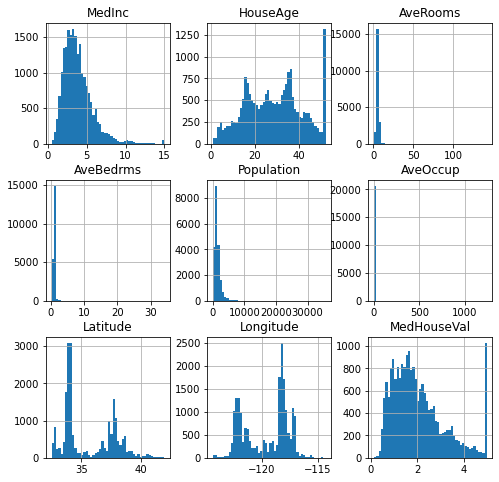

In [16]:
hist = ca_house.hist(figsize=(8,8), bins=50)

&#9989; **<font color=blue>DO THIS:</font>** Another way to look at the distribution is to use violine plots.

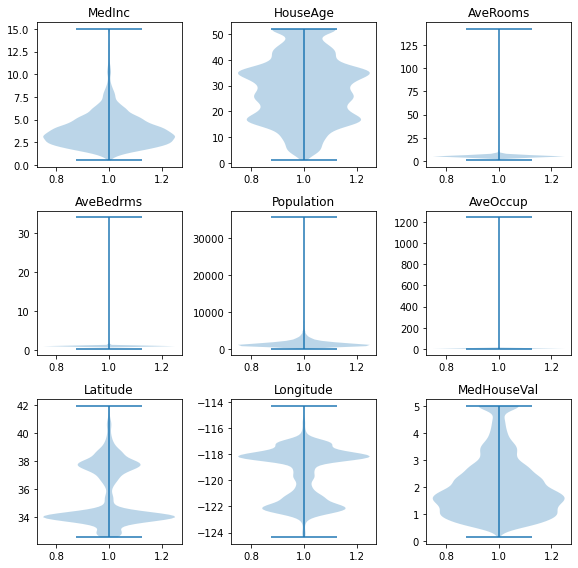

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
colnames  = ca_house.columns
count     = 0
for row in range(3):
    for col in range(3):
        axes[row, col].violinplot(ca_house.iloc[:,count])
        axes[row, col].title.set_text(colnames[count])
        count+=1
plt.tight_layout()
plt.show()

&#9989; <font color=red>**QUESTION:**</font> Looking at the univariate distributions, what's your first impression? Is there any pattern that stand out? Is there any pattern that you are concerned about before you analyze the data further?

<font size=+3>&#9998;</font> 
- If a colomn has patterns then data can be fitted into that distribution so uncertaininty is minimised.

## 2.3 Multivariate non-graphical EDA

In the previous two sections, we explore univariate EDA approaches. Frequently we are interested in __how varaibles are related to each other__. For example, for the California housing data, we may be interested to know if the median house value is related to any other variables.

&#9989; **<font color=blue>DO THIS:</font>** We can examine how variables covary by determine their correlations. One possibility is [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) which measures the strength of __linear association__ between two variables. So it is a parametric measure. 

But look at the violin plots again, the relationships between variables may not be linear. Thus, we should use a non-parametric correlation measure, such as [Spearman's rank](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).

In [18]:
corr_spearman = ca_house.corr(method = 'spearman')
corr_spearman

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.147308  0.643671  -0.252426    0.006268 -0.044171   
HouseAge    -0.147308  1.000000 -0.231409  -0.120981   -0.283879 -0.024833   
AveRooms     0.643671 -0.231409  1.000000   0.082046   -0.105385  0.018807   
AveBedrms   -0.252426 -0.120981  0.082046   1.000000    0.027027 -0.132315   
Population   0.006268 -0.283879 -0.105385   0.027027    1.000000  0.242337   
AveOccup    -0.044171 -0.024833  0.018807  -0.132315    0.242337  1.000000   
Latitude    -0.088029  0.032440  0.127134   0.047197   -0.123626 -0.150954   
Longitude   -0.009928 -0.150752 -0.044783   0.010884    0.123527  0.181468   
MedHouseVal  0.676778  0.074855  0.263367  -0.125187    0.003839 -0.256594   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.088029  -0.009928     0.676778  
HouseAge     0.032440  -0.150752     0.074855  
AveRooms     0.127134  -0.044783     0.263367  
AveBedrms    0.047197   0.010884    -0.125187  
Population  -0.123626   0.123527     0.003839  
AveOccup    -0.150954   0.181468    -0.256594  
Latitude     1.000000  -0.879203    -0.165739  
Longitude   -0.879203   1.000000    -0.069667  
MedHouseVal -0.165739  -0.069667     1.000000

## 2.4 Multivariate graphical EDA

The challenge with the non-graphical representation of multi-variate statistics is to find patterns quickly. We are much faster in finding patterns in shapes and colors than with numbers. 

While the non-graphical results are important for detailed studies, we should always try to summarize the multi-variable results graphically so you can spot the patterns and/or communicate your results more easily.

&#9989; **<font color=blue>DO THIS:</font>** An effective way to show such a correlation matrix is to use heatmap which can be generated with a number of graphing packages. Here, let's use [Seaborn](https://seaborn.pydata.org/).

In [19]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

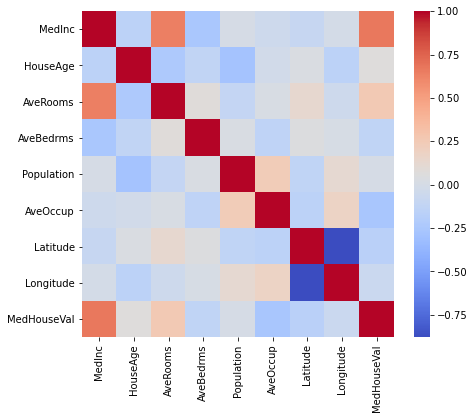

In [20]:
import seaborn as sns

plt.figure(figsize=(7,6))
sns.heatmap(corr_spearman, cmap="coolwarm")

&#9989; **<font color=red>QUESTION:</font>** Based on the plot above:

- Which two variables have the most positive correlation?
- Which two have the most negative correlation?

<AxesSubplot:>

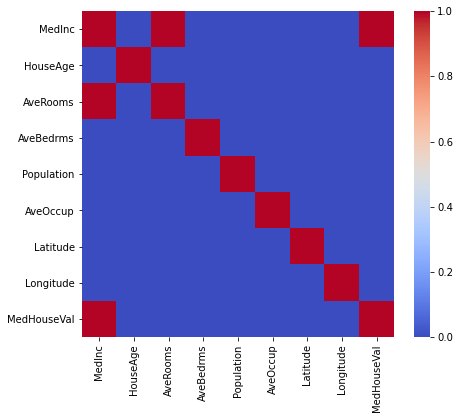

In [23]:
import seaborn as sns

plt.figure(figsize=(7,6))
sns.heatmap(corr_spearman>0.6, cmap="coolwarm")

<AxesSubplot:>

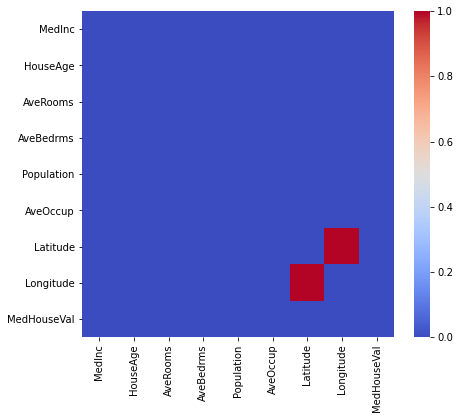

In [24]:
import seaborn as sns

plt.figure(figsize=(7,6))
sns.heatmap(corr_spearman<-0.6, cmap="coolwarm")

&#9989; **<font color=blue>DO THIS:</font>** Instead of correlation, which summarize the relationships between two variables in one value, we may also be interested in seeing how two variables are related to each other in more detais. In this case, we can use scatter plot.

[Note] There are quite a lot of data points so this will take a little time with the full data. Thus we use 2000 samples from `ca_house` here instead.

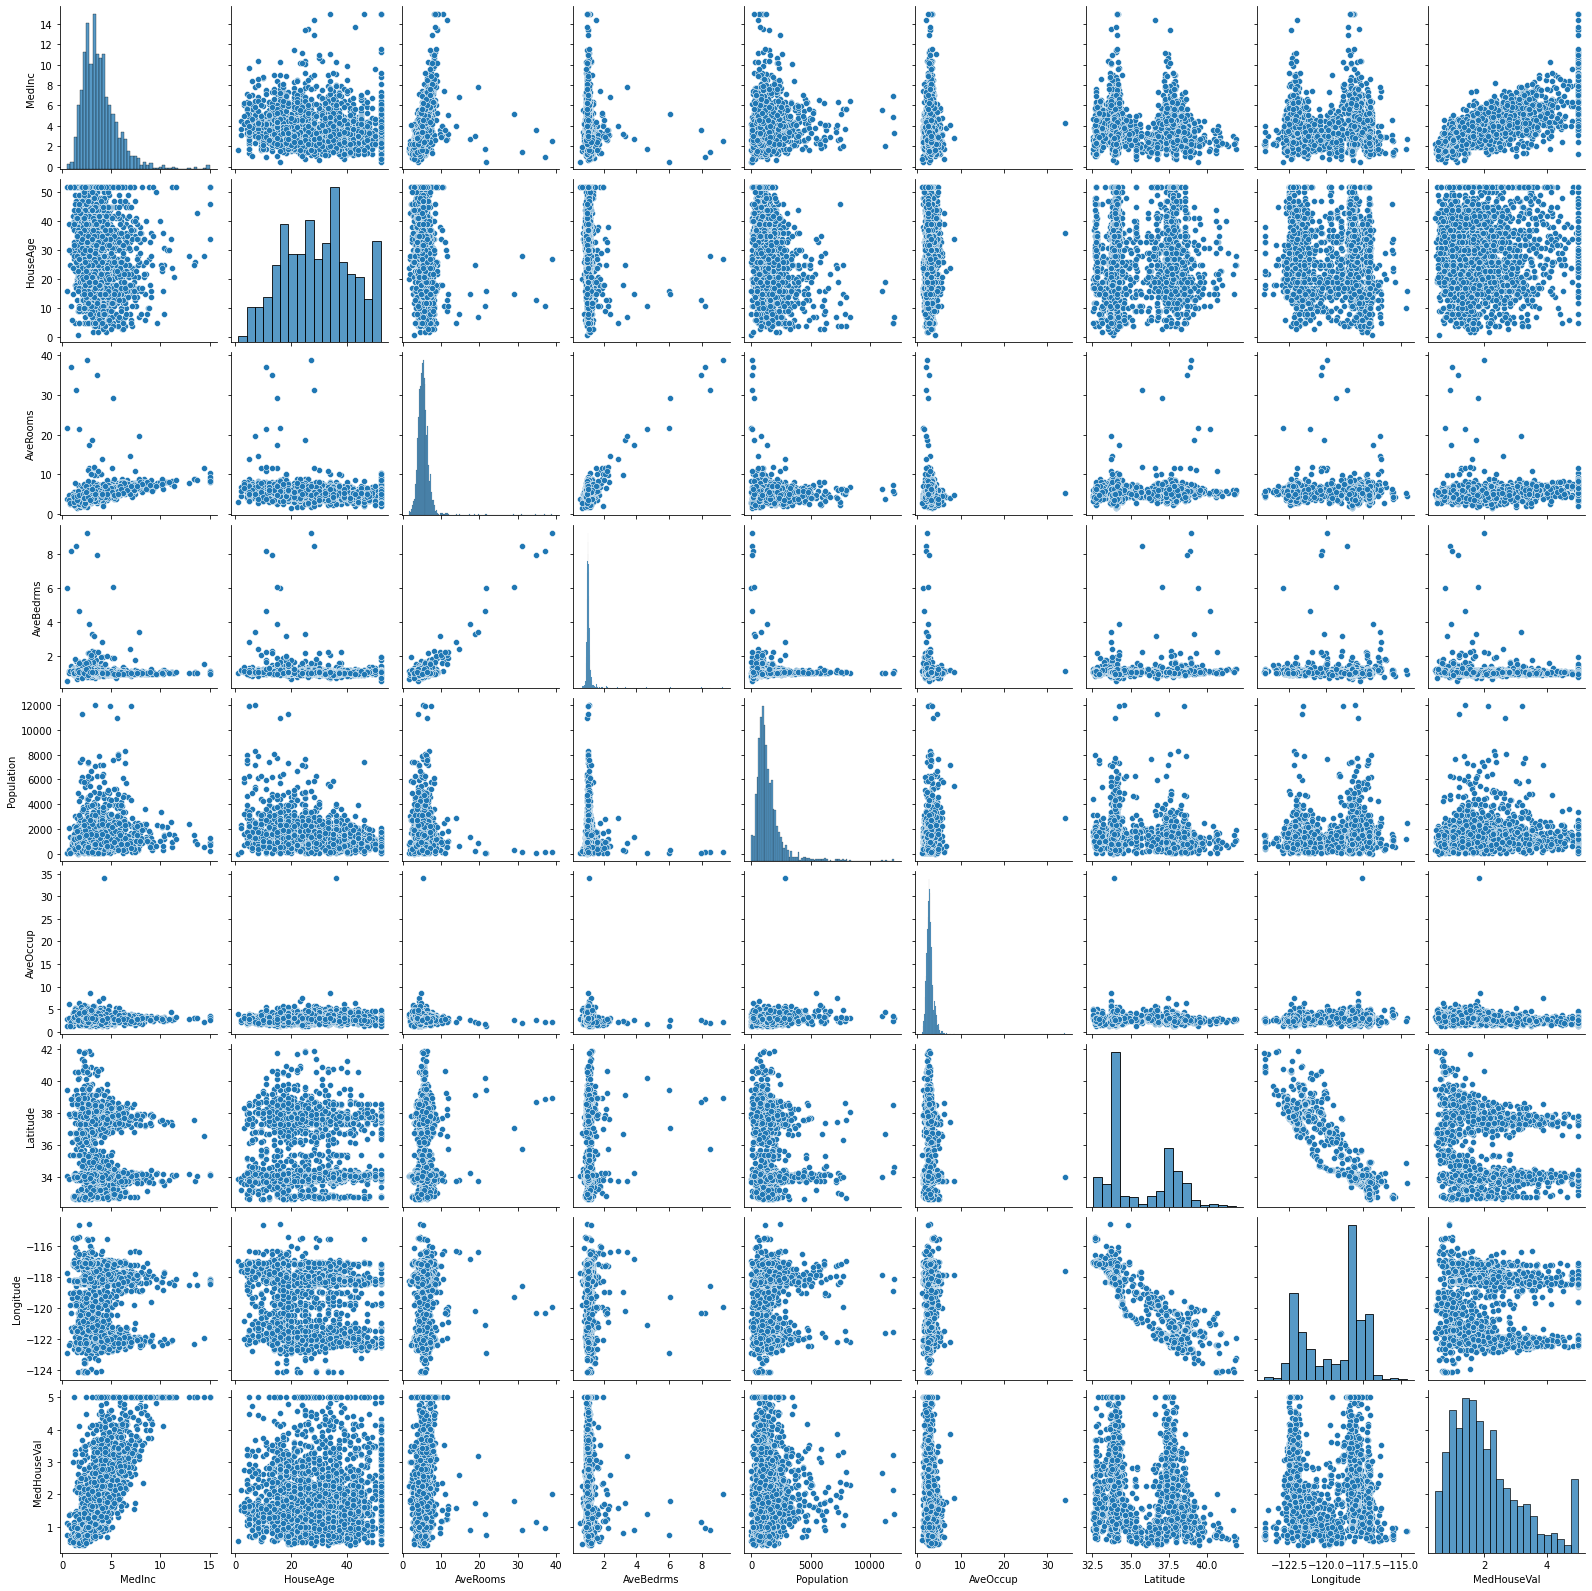

In [25]:
ca_house2k = ca_house.sample(2000)
sns.pairplot(ca_house2k)

&#9989; **<font color=red>QUESTION:</font>** The diagonal in the above plot show the univariate distribution of each variable. Off diagonal, you have scatter plots showing how pairs of variables are related. There are a lot of interesting information in this plot. Pick couple relations you find most interesting and explain them.

<font size=+3>&#9998;</font> 
- Data has no direct direct relationships, instead they are largely disperesed in 2d space.

----
<a name="linear"></a>
# 3. Basic linear model

Import the following packages and functions:

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1 Problem statement

Our goal here is to __build a basic linear model that can predict the median house value__ with other features (also referred to as attributes, features) in the dataset.

It is called __basic__ because the linear model we discuss here is the foundation where [many other forms of linear models](https://scikit-learn.org/stable/modules/linear_model.html) are built upon.  The basic linear model can be described with the following equation:

$$y = \beta_0 + \beta_1X_1 + \beta_1X_2 + ... + \beta_pX_p + \epsilon$$

$y$: The value of a __response variable__ we are interested in predicting.
- For the California housing problem we want to solve, $y$ is the `MedHouseVal`, the last column of the `cal_house` DataFrame.
- Also referred to as a dependent variable.

$X$: A __predictive variable__. 
- We have $p$ of them. for the problem we want to solve $p=8$ which correspond to the 1st 8 DataFrame columns.
- Also referred to as an indepdent variable, an attribute, or a __feature__ (emphasized because this is what's used in Machine Learning). 

$\beta_0$ is the intercept.

$\beta_1~\beta_p$: The __coefficients__ associated with different features.
- Can indicate how important a feature is.
- Also referred to as the __weights__.

$\epsilon$: error term.

&#9989; **<font color=blue>DO THIS:</font>** Separate $X$ and $y$. Write code to check the datatypes and shape of both.

In [27]:
X = ca_house.iloc[:,:-1]     # Use all columns except the last one as features
y = ca_house["MedHouseVal"]  # Median house value as the response variable

# put your code here


## 3.2 Separate training and testing data

The goals of building a statistical model (or any other types of models) are to:
1. Ask how well we can model a process/phenomenon given the features provided.
2. Determine which features are particularly important.
3. Apply our model to new cases to make good predictions.

To achieve these goals, we need to build the model __AND__ make sure our models work well. And to determine how well a model works, we need three things:
1. __Training dataset__: a set of cases that are used to build (or in machine learning lingo: __train__) the model.
2. __Testing dataset__: a set of cases that are __NOT__ used to build the model.
   - So we can evaluate the model __independently__.
3. __Model performance metric__: tells us how well the true values of the response variables correlate with the predicted values.


&#9989; **<font color=blue>DO THIS:</font>** Run the code cell below to separate training from testing data with the `train_test_split` function from Scikit-Learn. 

Note that we provide a `rand_state` value that serve as the seed for the random number generator to pick random rows for training and testing data.

Set the random state to a number of your liking.

In [28]:
# set your own random state
rand_state = 42 # <-- change this

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, random_state=rand_state)

&#9989; **<font color=blue>DO THIS:</font>** Write code below to print out what percentage of the data is used for training and testing, respectively that is the default setting in `train_test_split`.

In [30]:
# put your code here
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("70% for training, 30% for testing")

(15480, 8)
(15480,)
(5160, 8)
(5160,)
70% for training, 30% for testing


## 3.3 Train model and make predictions

&#9989; **<font color=blue>DO THIS:</font>** With the training and testing data available, we will next:
1. __Intialize a model__ - in this case `LinearRegression`. There are many other models (see [here](https://scikit-learn.org/stable/supervised_learning.html) for examples).  
2. __Train a model__ - with the `fit` function using training data.
3. __Predict test cases__ - with the `predict` function using testing data.
4. __Evaluate performance__ - with the `spearmanr` function from Scipy. 

In [31]:
lm = LinearRegression()          # Initialize a linear model obj
lm.fit(X_train, y_train)         # train the model
y_preds = lm.predict(X_test)     # predict with test data
spearmanr(y_test, y_preds)[0]    # get correlation

0.8126611793902537

&#9989; **<font color=blue>DO THIS:</font>** The Spearman's rank correlation is at 0.8 (max is 1), so it is pretty good! In the cell below, write code that will:

- Plot the true value (`y_test` as the x axis) against the predicted value (`y_preds`, as the y axis).
- Set the limits on x and y axes to be from 0 to 7 (with `xlim` and `ylim`).
- Label the x and y axes accordingly (with `xlabel` and `ylabel`). 
- Draw a diagonal line with slope of 1.
- Plot grid lines with `grid()`.

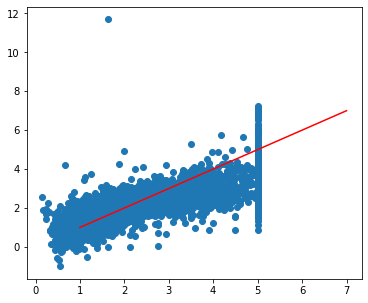

In [36]:
plt.figure(figsize=(6, 5))
ax = plt.axes()
ax.scatter(y_test,y_preds)
ax.plot([1, 2, 7], [1, 2, 7],color='r')

&#9989; **<font color=red>QUESTION:</font>** Looking at the scatter plot, what would your conclusion be on the model performance? In addition, did you see anything odd?


<font size=+3>&#9998;</font> Put your answer to the above question here

----
<a name="wrapup"></a>
# 4. Assignment wrap-up

Please fill out the [pre-class survey](https://docs.google.com/forms/d/e/1FAIpQLSfhEjAujkrA3E5h739qRzj9buceC2PhbCrSnc6ecHZoDydroQ/viewform) to receive credit for this assignment.

---------
### Congratulations, we're done!

To get credit for this assignment you must submit it before due date.